# FCV Slide Deck 
XX.

```{thebe}
```

In [3]:
# %%
# jupyter: {'source_hidden': true}
import os
import sys
import re
import requests
import socket
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
from typing import List, Dict, Any, Optional, Union
import numpy as np

# Add the project root to the Python path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_dir not in sys.path:
    sys.path.append(root_dir)

data_dir = os.path.join(root_dir, 'data')  
source_dir = os.path.join(root_dir, 'data', 'fsi-historic')   

from src.utils import UCDP, GIC, ACLEDDataFetcher, RegionMapper, UNHCRDataFinder, WorldBankAPI, FSIDataProcessor, FragilityClassifier, RefugeeAnalyzer, UNPopulationDataPortalAPI

# Set visualization style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Initialize UCDP processor
ucdp = UCDP()
gic = GIC()
acled = ACLEDDataFetcher(api_key="FVlH2Cg6J1EmOKTxxsUX", email="mpurroyvitola@worldbank.org")
region_mapper = RegionMapper()
unhcr = UNHCRDataFinder()
wb = WorldBankAPI()

print("✓ Setup complete: All required libraries imported and styles set")

✓ Setup complete: All required libraries imported and styles set


# Conflict
## Figure 1: Number of Armed Conflicts by Type
This visualization shows the evolution of different types of conflicts over time:
- Extra-systemic conflicts: Between a state and a non-state group outside its territory
- Inter-state conflicts: Between states
- Internal conflicts: Between a government and rebel groups
- Internationalized internal conflicts: Internal conflicts with foreign government involvement

No results on page 54

Processed data summary:
Years covered: 1946-2023
Number of years: 78
Total unique conflicts: 2636.0

Processed duration data summary:
Years covered: 1946-2023
Average conflict duration: 17.69 years
Maximum conflict duration: 38.67 years
Average number of active conflicts: 33.79


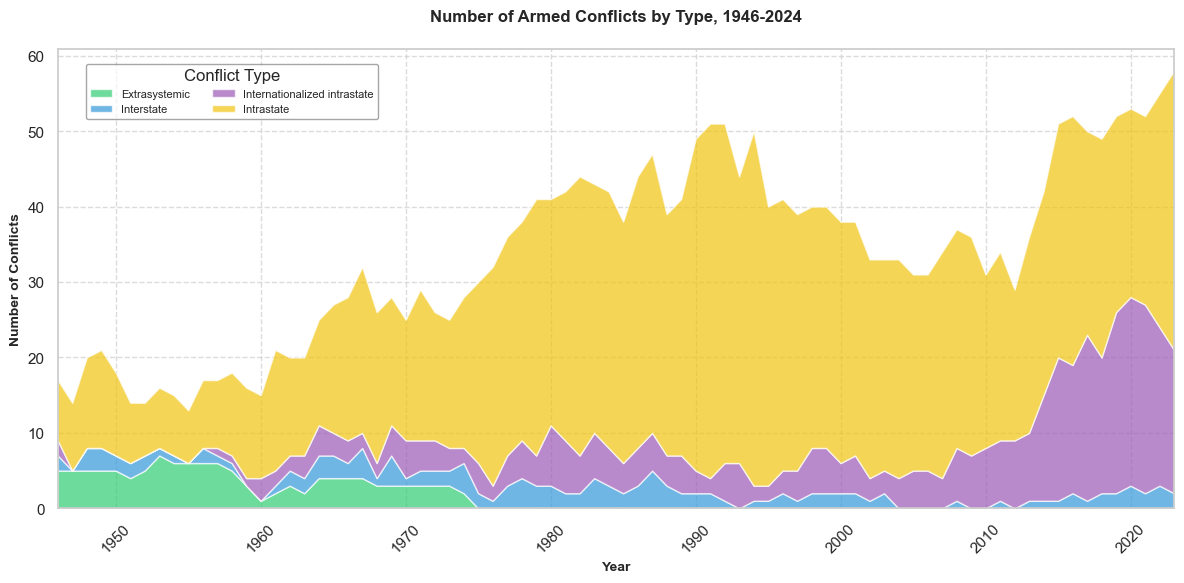

In [3]:
# %%
# jupyter: {'source_hidden': true}
# Fetch UCDP data
raw_data = ucdp.fetch_ucdp_data()
df_conflicts = ucdp.process_conflict_data(raw_data)
yearly_avg, decade_avg = ucdp.calculate_conflict_duration_panel(raw_data)

# Fetch fatalities data for a specific period
# fatalities_df = ucdp.fetch_fatalities_data(
#     start_date='1995-11-01',
#     end_date='2024-12-31'
# )

def create_conflict_plot(df, save_fig=False):
    """Create stacked area plot showing evolution of conflict types"""
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get colors for each conflict type
    colors = [UCDP.get_conflict_colors()[col] for col in df.columns]
    
    # Create stacked area plot
    ax.stackplot(df.index, 
                [df[col] for col in df.columns],
                labels=df.columns,
                colors=colors,
                alpha=0.7)
    
    # Customize plot
    ax.set_xlabel('Year', fontsize=10, fontweight='bold')
    ax.set_ylabel('Number of Conflicts', fontsize=10, fontweight='bold')
    ax.set_title('Number of Armed Conflicts by Type, 1946-2024',
                fontsize=12, pad=20, fontweight='bold')
    
    # Set x-axis range
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Add legend inside the plot with two columns
    ax.legend(
        loc='upper left',
        bbox_to_anchor=(0.02, 0.98),
        ncol=2,
        fontsize=8,
        title='Conflict Type',
        frameon=True,
        facecolor='white',
        edgecolor='gray',
        framealpha=0.7
    )
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig('conflict_evolution.png',
                    dpi=300,
                    bbox_inches='tight')
    
    return fig

# Create and display visualization
fig = create_conflict_plot(df_conflicts)
plt.show()


## Figure 2 - Average duration of armed conflict worldwide, 1965-2024
XX.

2025-02-11 21:32:30,001 - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-11 21:32:30,003 - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


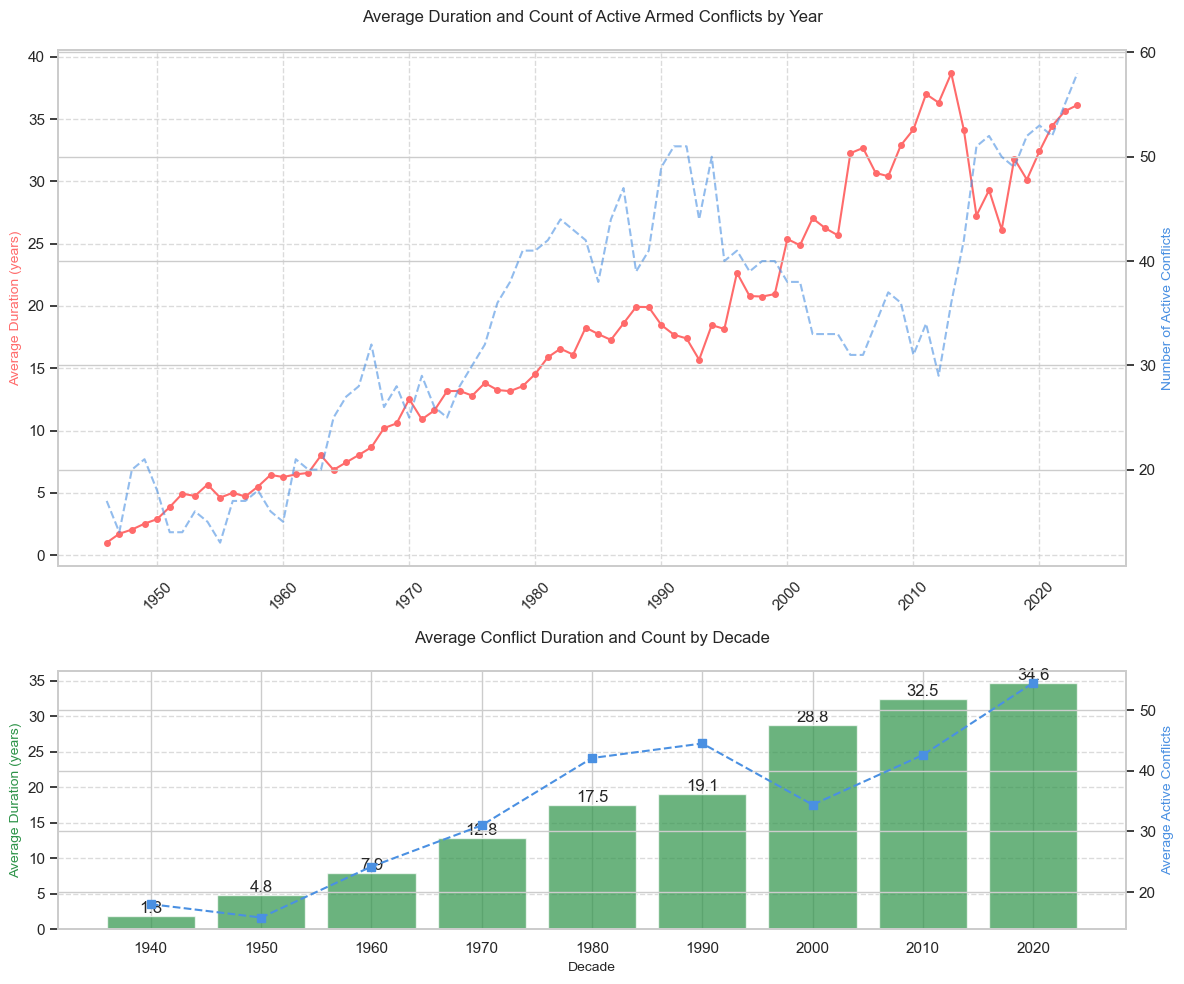

In [38]:
# %%
# jupyter: {'source_hidden': true}
def create_conflict_duration_plots(yearly_avg: pd.DataFrame, 
                                 decade_avg: pd.DataFrame, 
                                 save_fig: bool = False) -> plt.Figure:
    """
    Create visualization of conflict durations with yearly and decade views
    
    Parameters:
    -----------
    yearly_avg : pd.DataFrame
        DataFrame with yearly average durations
    decade_avg : pd.DataFrame
        DataFrame with decade averages
    save_fig : bool
        Whether to save the figure
        
    Returns:
    --------
    plt.Figure
        The generated figure object
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[2, 1])
    
    # Plot 1: Average duration line plot
    ax1.plot(yearly_avg['year'], yearly_avg['avg_duration'], 
            marker='o', linestyle='-', color='#FF6B6B', markersize=4)
    
    # Add number of conflicts as a second y-axis
    ax1_twin = ax1.twinx()
    ax1_twin.plot(yearly_avg['year'], yearly_avg['active_conflicts'],
                 color='#4A90E2', linestyle='--', alpha=0.6)
    
    # Customize the line plot
    ax1.set_xlabel('')
    ax1.set_ylabel('Average Duration (years)', color='#FF6B6B', fontsize=10)
    ax1_twin.set_ylabel('Number of Active Conflicts', color='#4A90E2', fontsize=10)
    ax1.set_title('Average Duration and Count of Active Armed Conflicts by Year', 
                 fontsize=12, pad=20)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Decade averages bar plot
    bars = ax2.bar(decade_avg['decade'].astype(str), 
                  decade_avg['avg_duration'],
                  color='#2D9348', alpha=0.7)
    
    # Add decade average conflict counts
    ax2_twin = ax2.twinx()
    ax2_twin.plot(range(len(decade_avg)), decade_avg['active_conflicts'],
                 color='#4A90E2', marker='s', linestyle='--')
    
    # Customize the bar plot
    ax2.set_xlabel('Decade', fontsize=10)
    ax2.set_ylabel('Average Duration (years)', color='#2D9348', fontsize=10)
    ax2_twin.set_ylabel('Average Active Conflicts', color='#4A90E2', fontsize=10)
    ax2.set_title('Average Conflict Duration and Count by Decade', fontsize=12, pad=20)
    ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig('conflict_duration_panel.png', dpi=300, bbox_inches='tight')
    
    return fig

fig = create_conflict_duration_plots(yearly_avg, decade_avg)
plt.show()

## Figure 3 - Global Coup Attempts
XX.

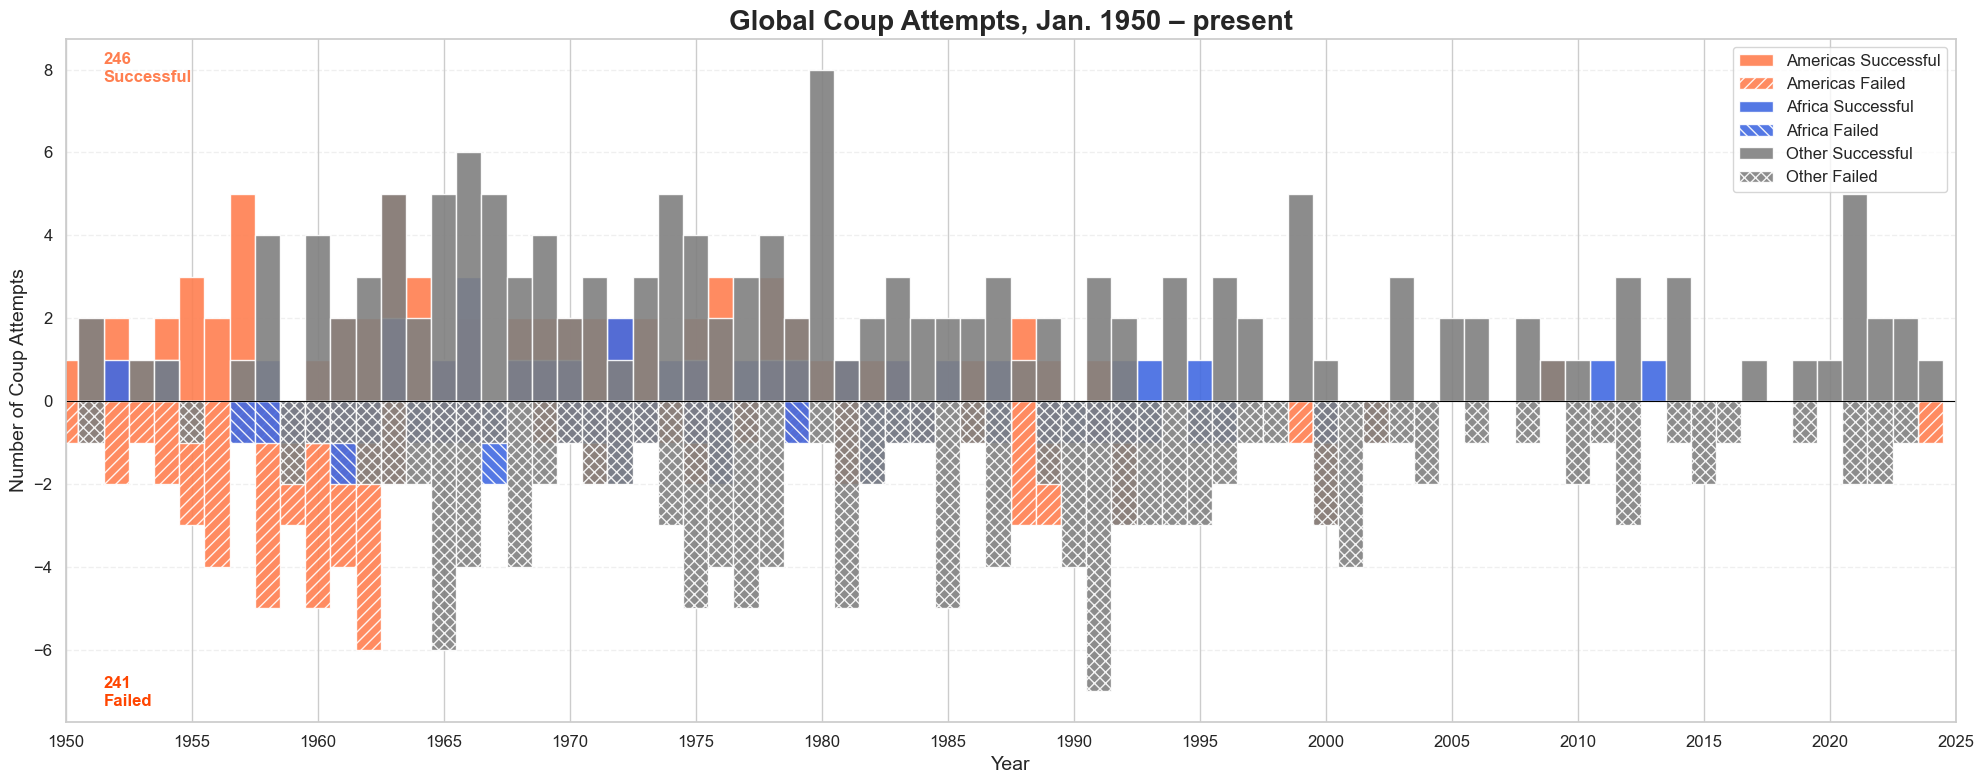

In [21]:
# %%
# jupyter: {'source_hidden': true}
# # Fetch GIC data
df_gic = gic.processed_data

def plot_global_coup_attempts(data, start_year=1950, end_year=2025):
    """
    Create a visualization of global coup attempts with patterns for failed coups
    
    Parameters:
    -----------
    data : pandas.DataFrame
        Processed coup data 
    start_year : int, optional
        Starting year for the plot (default is 1950)
    end_year : int, optional
        Ending year for the plot to nowadays
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create figure with specific dimensions
    fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
    
    # Filter data for specified year range
    plot_data = data[
        (data['year'] >= start_year) & 
        (data['year'] <= end_year)
    ]
    
    # Group data by year, region, and coup status
    yearly_data = plot_data.groupby(['year', 'region', 'coup_status']).size().reset_index(name='count')
    
    # Color palette and hatch patterns
    colors = {
        ('Americas', 2): '#FF7F50',   # Coral for successful Americas coups
        ('Americas', 1): '#FF7F50',   # Same color for failed but with pattern
        ('Africa', 2): '#4169E1',     # Royal blue for successful Africa coups
        ('Africa', 1): '#4169E1',     # Same color for failed but with pattern
        ('Other', 2): '#808080',      # Gray for successful Other coups
        ('Other', 1): '#808080'       # Same color for failed but with pattern
    }
    
    # Hatch patterns for failed coups
    hatches = {
        'Americas': '///',
        'Africa': '\\\\\\',
        'Other': 'xxx'
    }
    
    # Regions to plot
    regions = ['Americas', 'Africa', 'Other']
    
    # Plot each region's coups
    for region in regions:
        region_data = yearly_data[yearly_data['region'] == region]
        
        # Successful coups (above zero)
        successful = region_data[region_data['coup_status'] == 2]
        for _, row in successful.iterrows():
            ax.bar(row['year'], row['count'], 
                  color=colors.get((region, 2)), 
                  alpha=0.9, 
                  width=1, 
                  label=f'{region} Successful' if row['year'] == successful.iloc[0]['year'] else "")
        
        # Failed coups (below zero)
        failed = region_data[region_data['coup_status'] == 1]
        for _, row in failed.iterrows():
            ax.bar(row['year'], -row['count'], 
                  color=colors.get((region, 1)), 
                  alpha=0.9, 
                  width=1,
                  hatch=hatches[region],
                  label=f'{region} Failed' if row['year'] == failed.iloc[0]['year'] else "")
    
    # Styling
    ax.set_title('Global Coup Attempts, Jan. 1950 – present', fontsize=20, fontweight='bold')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Number of Coup Attempts', fontsize=14)
    
    # X-axis setup
    ax.set_xlim(start_year, end_year)
    ax.set_xticks(np.arange(start_year, end_year+1, 5))
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Grid
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)
    
    # Zero line
    ax.axhline(y=0, color='black', linewidth=0.8)
    
    # Total coup annotations
    successful_total = yearly_data[yearly_data['coup_status'] == 2]['count'].sum()
    failed_total = yearly_data[yearly_data['coup_status'] == 1]['count'].sum()
    
    ax.text(0.02, 0.98, f'{successful_total}\nSuccessful', transform=ax.transAxes, 
            verticalalignment='top', fontsize=12, fontweight='bold', color='#FF7F50')
    ax.text(0.02, 0.02, f'{failed_total}\nFailed', transform=ax.transAxes, 
            verticalalignment='bottom', fontsize=12, fontweight='bold', color='#FF4500')
    
    # Add legend with custom ordering
    handles, labels = ax.get_legend_handles_labels()
    # Reorder to group by region
    order = ['Americas Successful', 'Americas Failed',
             'Africa Successful', 'Africa Failed',
             'Other Successful', 'Other Failed']
    ordered_handles = []
    ordered_labels = []
    for label in order:
        idx = labels.index(label)
        ordered_handles.append(handles[idx])
        ordered_labels.append(labels[idx])
    
    ax.legend(ordered_handles, ordered_labels, 
             loc='upper right', 
             fontsize=12, 
             frameon=True)
    
    plt.tight_layout()
    return plt

# Example usage
if __name__ == '__main__':
    plt = plot_global_coup_attempts(df_gic)
    plt.show()

## Figure 4.1 - Conflict-induced fatalities by region (ACLED)
XX.

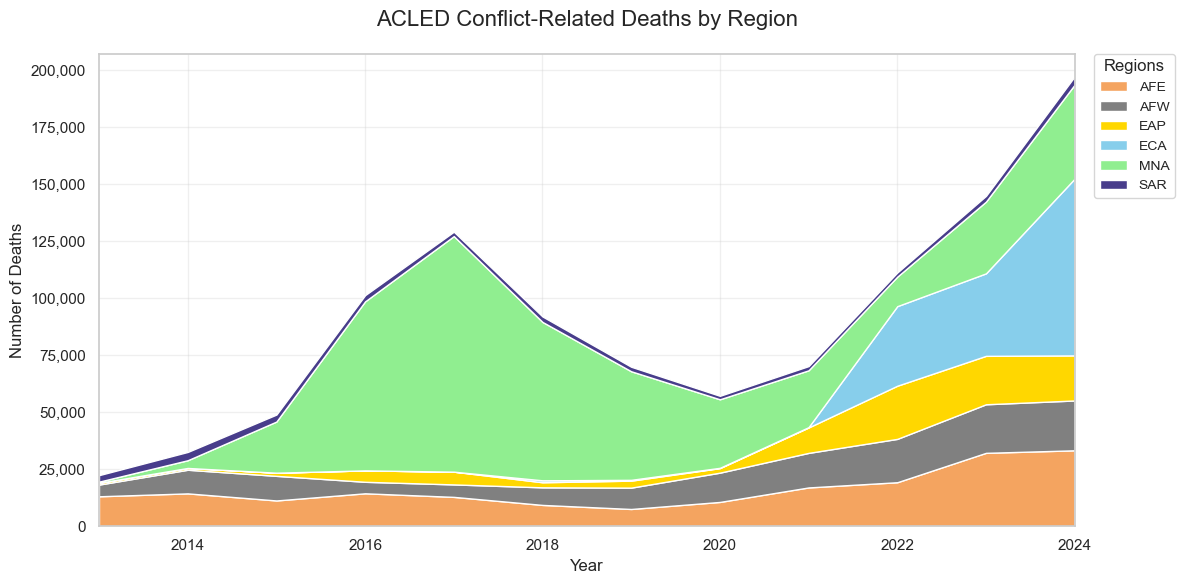

In [9]:
# %%
# jupyter: {'source_hidden': true}
# Initialize ACLED data fetcher
# Create date objects
# start_date = datetime(2013, 1, 1)
# end_date = datetime(2025, 1, 31)

# # Fetch raw data
# df_acled = acled.fetch_data(start_date, end_date)

# # Process the data
# df_acled_processed = acled.process_data(df_acled)

# # Get conflict-related deaths if needed
# df_acled_crd = acled.get_conflict_related_deaths(df_acled_processed)

# # Get event counts if needed
# df_acled_events = acled.get_event_counts(df_acled_processed)

def plot_acled_regional_deaths(df_acled_crd, region_mapper=None):
    """
    Create a stacked area plot of ACLED conflict-related deaths by region
    
    Parameters:
    -----------
    df_acled_crd : pd.DataFrame
        DataFrame with columns: iso3, year, month, ACLED_conflict_related_deaths
    region_mapper : RegionMapper, optional
        Region mapping object (default creates a simple one)
    
    Returns:
    --------
    matplotlib.pyplot
        Stacked area plot of deaths by region
    """
    import pycountry

    if region_mapper is None:
        region_mapper = RegionMapper()
    
    # Comprehensive region mapping
    region_mapping = {
        'AFE': [  # Eastern Africa
            'Kenya', 'Ethiopia', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 
            'Somalia', 'South Sudan', 'Sudan', 'Eritrea', 'Djibouti'
        ],
        'AFW': [  # Western Africa
            'Nigeria', 'Ghana', 'Senegal', 'Mali', 'Burkina Faso', 'Guinea', 
            'Ivory Coast', 'Liberia', 'Sierra Leone', 'Togo', 'Benin', 'Niger', 
            'Gambia', 'Guinea-Bissau', 'Cape Verde'
        ],
        'EAP': [  # East Asia & Pacific
            'China', 'Japan', 'South Korea', 'Indonesia', 'Philippines', 'Vietnam', 
            'Thailand', 'Myanmar', 'Cambodia', 'Laos', 'Malaysia', 'Mongolia', 
            'Singapore', 'Papua New Guinea', 'Australia', 'New Zealand'
        ],
        'ECA': [  # Europe & Central Asia
            'Russia', 'Turkey', 'Ukraine', 'Kazakhstan', 'Uzbekistan', 'Georgia', 
            'Azerbaijan', 'Armenia', 'Moldova', 'Belarus', 'Poland', 'Romania', 
            'Bulgaria', 'Greece', 'Serbia', 'Croatia'
        ],
        'MNA': [  # Middle East & North Africa
            'Egypt', 'Iran', 'Iraq', 'Syria', 'Lebanon', 'Jordan', 'Palestine', 
            'Israel', 'Yemen', 'Saudi Arabia', 'United Arab Emirates', 'Algeria', 
            'Morocco', 'Tunisia', 'Libya', 'Bahrain', 'Kuwait', 'Oman', 'Qatar'
        ],
        'SAR': [  # South Asia
            'India', 'Pakistan', 'Bangladesh', 'Afghanistan', 'Nepal', 'Sri Lanka', 
            'Bhutan', 'Maldives'
        ]
    }
    
    def map_country_to_region(iso3):
        try:
            country_name = pycountry.countries.get(alpha_3=iso3).name
            for region, countries in region_mapping.items():
                if any(country.lower() in country_name.lower() for country in countries):
                    return region
            return 'Other'
        except (AttributeError, ValueError):
            return 'Other'
    
    # Create a copy of the DataFrame to avoid modifying the original
    df = df_acled_crd.copy()
    
    # Add region column
    df['region'] = df['iso3'].apply(map_country_to_region)
    
    # Group by year and region, sum deaths
    yearly_region_deaths = df.groupby(['year', 'region'])['ACLED_conflict_related_deaths'].sum().unstack(fill_value=0)
    
    # Ensure all regions are present
    regions = ['AFE', 'AFW', 'EAP', 'ECA', 'MNA', 'SAR']
    for region in regions:
        if region not in yearly_region_deaths.columns:
            yearly_region_deaths[region] = 0
    
    # Select and order columns
    yearly_region_deaths = yearly_region_deaths[regions]
    
    # Filter for years 2013-2024
    yearly_region_deaths = yearly_region_deaths.loc[2013:2024]
    
    # Create the stacked area plot
    plt.figure(figsize=(12, 6))
    
    # Color palette matching the original figure
    colors = {
        'AFE': '#F4A460',   # Sandy Brown
        'AFW': '#808080',   # Gray
        'EAP': '#FFD700',   # Gold
        'ECA': '#87CEEB',   # Sky Blue
        'MNA': '#90EE90',   # Light Green
        'SAR': '#483D8B'    # Dark Slate Blue
    }
    
    # Plot stacked area
    plt.stackplot(yearly_region_deaths.index, 
                 [yearly_region_deaths[region] for region in regions],
                 labels=regions,
                 colors=[colors[region] for region in regions])
    
    # Styling
    plt.title('ACLED Conflict-Related Deaths by Region', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Deaths', fontsize=12)
    plt.xlim(2013, 2024)
    plt.grid(True, alpha=0.3)

     # Legend
    plt.legend(title='Regions', 
              bbox_to_anchor=(1.02, 1),
              loc='upper left',
              frameon=True,
              fontsize=10,
              title_fontsize=12,
              borderaxespad=0.)   
    
    # Format y-axis with thousands separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.tight_layout()
    return plt

# Create the plot
plot = plot_acled_regional_deaths(df_acled_crd)
plot.show()


## Figure 4.1.1 - Conflict-induced fatalities by income (ACLED)


Total conflict-related deaths (2013-2024): 1,190,619

Distribution by income group:
High income: 13,358 deaths (1.1%)
Upper middle income: 283,870 deaths (23.8%)
Lower middle income: 300,919 deaths (25.3%)
Low income: 586,505 deaths (49.3%)
Not classified: 5,967 deaths (0.5%)


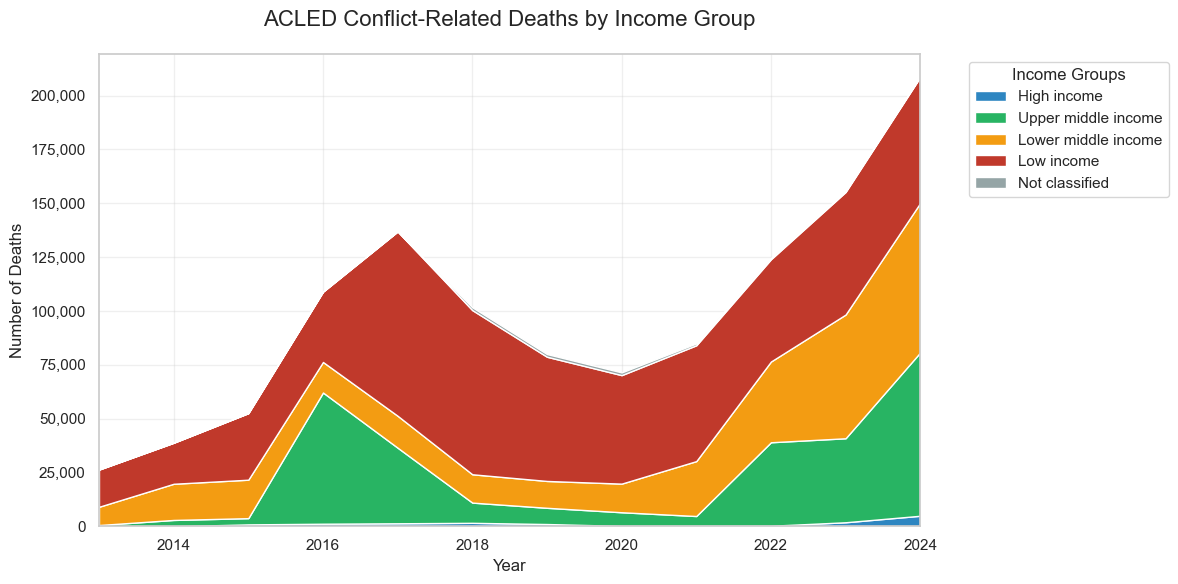

In [11]:
lend_group_path = os.path.join(data_dir, 'lend_group.xlsx')

def plot_acled_income_deaths(df_acled_crd, lend_group_path):
    """
    Create a stacked area plot of ACLED conflict-related deaths by income group
    
    Parameters:
    -----------
    df_acled_crd : pd.DataFrame
        DataFrame with columns: iso3, year, month, ACLED_conflict_related_deaths
    lend_group_path : str
        Path to the lending group Excel file
        
    Returns:
    --------
    matplotlib.pyplot
        Stacked area plot of deaths by income group
    """
    # Read lending group data
    import pandas as pd
    lend_group = pd.read_excel(lend_group_path)
    
    # Create a copy of the DataFrame to avoid modifying the original
    df = df_acled_crd.copy()
    
    # Merge with lending group data
    # Assuming 'Code' is the ISO3 code column in lend_group
    df = df.merge(lend_group[['Code', 'Income group']], 
                 left_on='iso3', 
                 right_on='Code', 
                 how='left')
    
    # Fill missing income groups
    df['Income group'] = df['Income group'].fillna('Not classified')
    
    # Group by year and income group, sum deaths
    yearly_income_deaths = df.groupby(
        ['year', 'Income group'])['ACLED_conflict_related_deaths'].sum().unstack(fill_value=0)
    
    # Define income groups in desired order
    income_groups = [
        'High income',
        'Upper middle income',
        'Lower middle income',
        'Low income',
        'Not classified'
    ]
    
    # Ensure all income groups are present
    for group in income_groups:
        if group not in yearly_income_deaths.columns:
            yearly_income_deaths[group] = 0
    
    # Select and order columns
    yearly_income_deaths = yearly_income_deaths[income_groups]
    
    # Filter for years 2013-2024
    yearly_income_deaths = yearly_income_deaths.loc[2013:2024]
    
    # Create the stacked area plot
    plt.figure(figsize=(12, 6))
    
    # Color palette for income groups
    colors = {
        'High income': '#2E86C1',        # Blue
        'Upper middle income': '#28B463', # Green
        'Lower middle income': '#F39C12', # Orange
        'Low income': '#C0392B',         # Red
        'Not classified': '#95A5A6'       # Gray
    }
    
    # Plot stacked area
    plt.stackplot(yearly_income_deaths.index, 
                 [yearly_income_deaths[group] for group in income_groups],
                 labels=income_groups,
                 colors=[colors[group] for group in income_groups])
    
    # Styling
    plt.title('ACLED Conflict-Related Deaths by Income Group', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Deaths', fontsize=12)
    plt.legend(title='Income Groups', 
              bbox_to_anchor=(1.05, 1), 
              loc='upper left', 
              frameon=True)
    plt.xlim(2013, 2024)
    plt.grid(True, alpha=0.3)
    
    # Format y-axis with thousands separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # Add summary statistics
    total_deaths = yearly_income_deaths.sum().sum()
    print(f"\nTotal conflict-related deaths (2013-2024): {total_deaths:,.0f}")
    
    # Print percentage by income group
    print("\nDistribution by income group:")
    for group in income_groups:
        group_total = yearly_income_deaths[group].sum()
        percentage = (group_total / total_deaths) * 100
        print(f"{group}: {group_total:,.0f} deaths ({percentage:.1f}%)")
    
    plt.tight_layout()
    return plt

plot = plot_acled_income_deaths(df_acled_crd, lend_group_path)
plot.show()

## Figure 4.2 - Conflict-induced fatalities by type of conflict (UCDP)
XX.

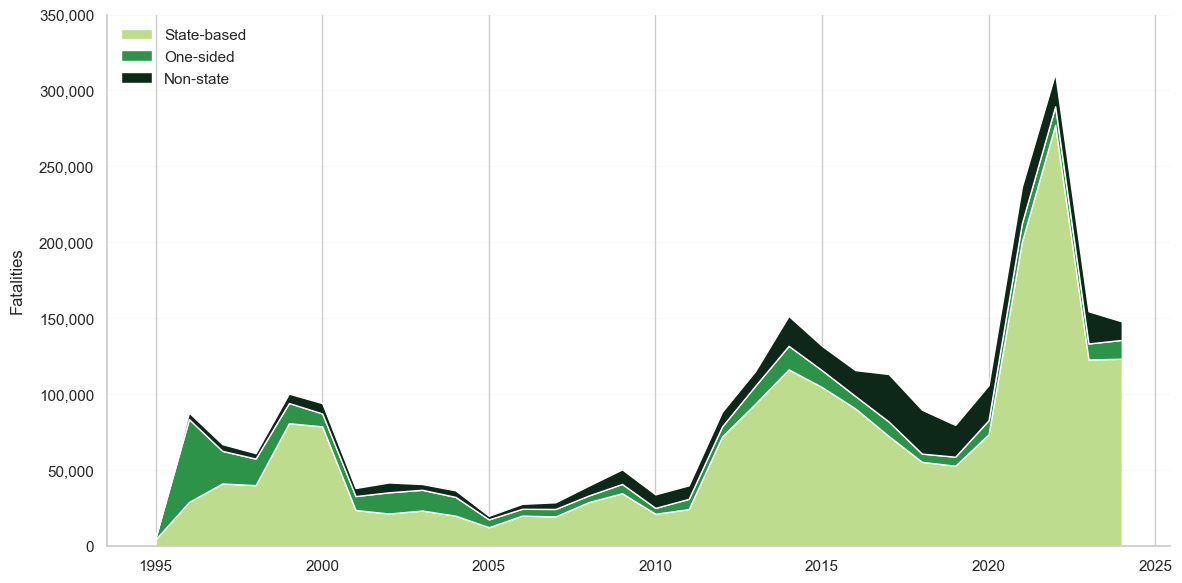

✓ Figure 5 generated successfully


In [4]:
# %%
# jupyter: {'source_hidden': true}
def plot_fatalities(df: pd.DataFrame, output_path: Optional[str] = None) -> None:
    """
    Create a stacked area plot of fatalities by violence type
    
    Parameters:
    -----------
    df : pd.DataFrame
        Processed fatalities data containing columns:
        total_deaths_state_based, total_deaths_one_sided, total_deaths_non_state
    output_path : str, optional
        If provided, save the plot to this path
    """
    # Create the figure
    plt.figure(figsize=(12, 6))
    
    # Extract data for each violence type
    years = df.index
    state_based = df['total_deaths_state_based']
    one_sided = df['total_deaths_one_sided']
    non_state = df['total_deaths_non_state']
    
    # Create stacked area plot
    plt.stackplot(years, 
                 [state_based, one_sided, non_state],
                 labels=['State-based', 'One-sided', 'Non-state'],
                 colors=['#BDDC8D', '#2D9348', '#0D2818'])  # Light green, Medium green, Dark green
    
    # Customize the plot
    plt.xlabel('')
    plt.ylabel('Fatalities', rotation=90, labelpad=10)
    
    # Format y-axis with thousands
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Add thousands separator to y-axis labels
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticks(current_values)
    
    # Customize grid (only horizontal lines)
    plt.grid(axis='y', linestyle='-', alpha=0.1)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Customize legend
    plt.legend(loc='upper left', frameon=False)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if output path is provided
    if output_path:
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"Plot saved to {output_path}")
        
    return plt
    
 
plot = plot_fatalities(fatalities_df)
plot.show() 

print("✓ Figure 5 generated successfully")

## Figure 4.3 - UCDP by income group
XX.

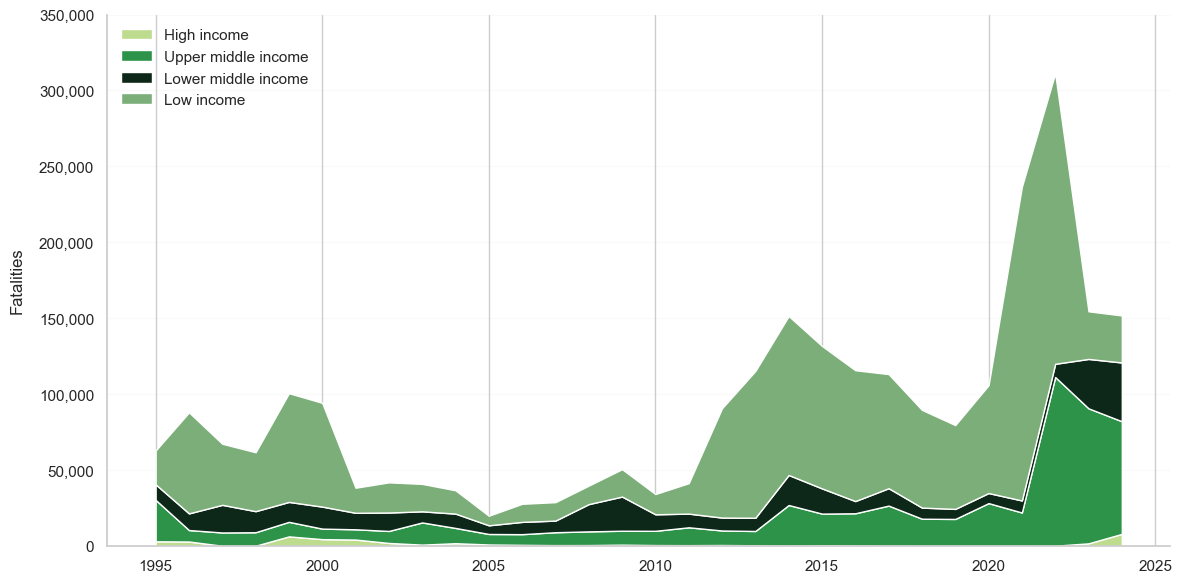

In [6]:
# %%
# jupyter: {'source_hidden': true}
def plot_fatalities_by_income(data_dir: str):
    """
    Create a stacked area plot of total fatalities by income group
    
    Parameters:
    -----------
    data_dir : str
        Directory containing both UCDP and lending group data
    """
    # Construct file paths
    ucdp_path = os.path.join(data_dir, 'ucdp.csv')
    lend_group_path = os.path.join(data_dir, 'lend_group.xlsx')
    
    # Read data
    ucdp = pd.read_csv(ucdp_path, usecols=['iso3', 'year', 'UCDP_BRD'])
    lend_group = pd.read_excel(lend_group_path)
    
    # Merge datasets
    df = ucdp.merge(lend_group[['Code', 'Income group']], 
                    left_on='iso3', 
                    right_on='Code', 
                    how='left')
    
    # Group by year and income group, sum fatalities
    yearly_fatalities = df.groupby(['year', 'Income group'])['UCDP_BRD'].sum().reset_index()
    
    # Pivot data for plotting
    fatalities_pivot = yearly_fatalities.pivot(
        index='year',
        columns='Income group',
        values='UCDP_BRD'
    )
    
    # Create the figure
    plt.figure(figsize=(12, 6))
    
    # Filter years between 1995 and 2024
    fatalities_pivot = fatalities_pivot[(fatalities_pivot.index >= 1995) & (fatalities_pivot.index < 2025)]
    years = fatalities_pivot.index
    income_groups = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
    
    # Filter and reorder columns based on income groups that exist in the data
    available_groups = [group for group in income_groups if group in fatalities_pivot.columns]
    fatalities_data = [fatalities_pivot[group].fillna(0) for group in available_groups]
    
    # Define colors for income groups
    colors = ['#BDDC8D', '#2D9348', '#0D2818', '#7CAE7A']  # Light green to dark green
    
    # Create stacked area plot
    plt.stackplot(years, 
                 fatalities_data,
                 labels=available_groups,
                 colors=colors[:len(available_groups)])
    
    # Customize the plot
    plt.xlabel('')
    plt.ylabel('Fatalities', rotation=90, labelpad=10)
    
    # Format y-axis with thousands
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Add thousands separator to y-axis labels
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticks(current_values)
    
    # Customize grid (only horizontal lines)
    plt.grid(axis='y', linestyle='-', alpha=0.1)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Customize legend
    plt.legend(loc='upper left', frameon=False)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt

plot = plot_fatalities_by_income(data_dir)
plot.show()

# Displacement
## Figure 6 - Forcibly Displaced Persons
XX.

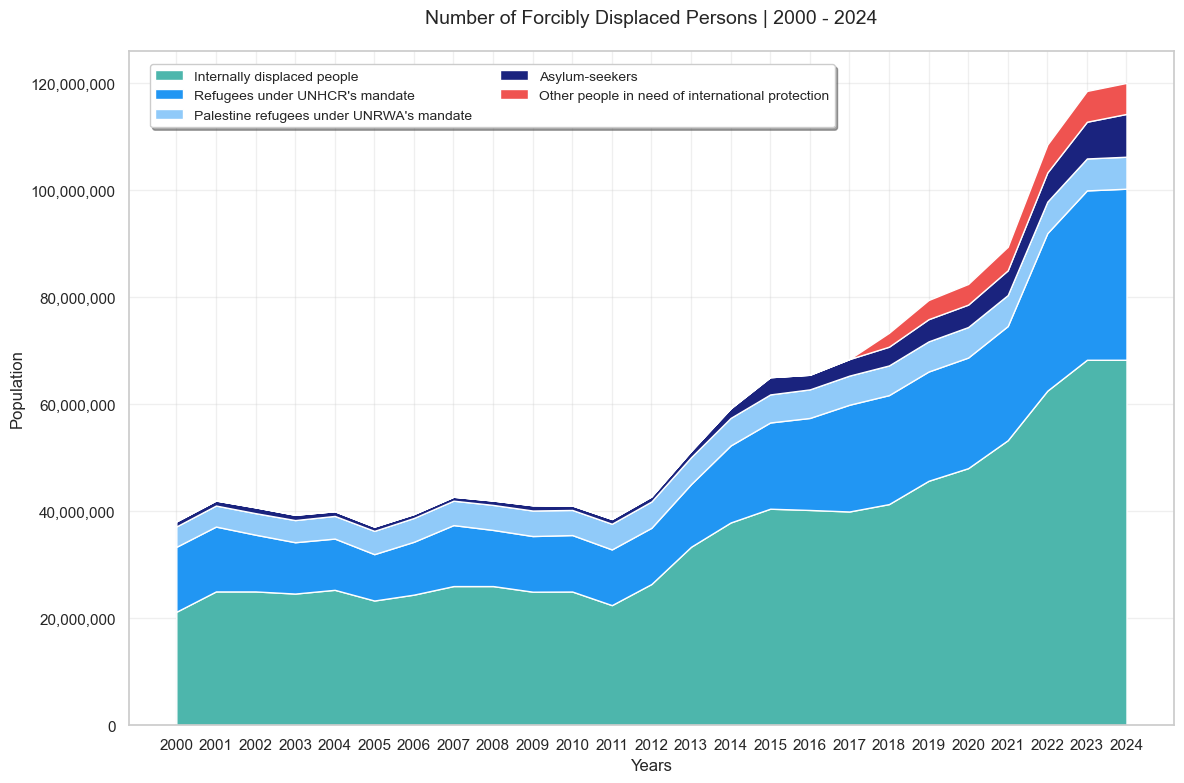

In [22]:
# %%
# jupyter: {'source_hidden': true}
# Get processed data suitable for visualization
def prepare_data_for_plotting(df_unchr):
    """
    Prepare the data for plotting by ensuring correct types and handling missing values
    
    Parameters:
    -----------
    df_unchr : pd.DataFrame
        Input DataFrame from UNHCR data
        
    Returns:
    --------
    pd.DataFrame
        Processed DataFrame ready for plotting
    """
    # List of columns that should be numeric
    numeric_cols = ['refugees_unhcr', 'asylum_seekers', 'other_protection', 
                   'refugees_unrwa', 'idps']
    
    # Create a copy to avoid modifying the original
    plot_df = df_unchr.copy()
    
    # Convert numeric columns and replace '-' with 0
    for col in numeric_cols:
        # Replace '-' with 0
        if col in plot_df.columns:
            plot_df[col] = plot_df[col].replace('-', 0)
            # Convert to numeric, replacing errors with 0
            plot_df[col] = pd.to_numeric(plot_df[col], errors='coerce').fillna(0)
    
    return plot_df

def plot_forced_displacement(df_input, output_path=None):
    """
    Create a stacked area plot of forced displacement data
    
    Parameters:
    -----------
    df_input : pd.DataFrame
        DataFrame containing columns: year, refugees_unhcr, asylum_seekers,
        other_protection, refugees_unrwa, idps
    output_path : str, optional
        If provided, save the plot to this path
    """
    # Prepare data
    plot_df = prepare_data_for_plotting(df_input)
    
    # Create the figure with specified size and extra space for legend
    plt.figure(figsize=(12, 8))
    
    # Get the years for x-axis
    years = plot_df['year']
    
    # Prepare the data arrays
    idps = plot_df['idps'].values
    refugees_unhcr = plot_df['refugees_unhcr'].values
    refugees_unrwa = plot_df['refugees_unrwa'].values
    asylum_seekers = plot_df['asylum_seekers'].values
    other_protection = plot_df['other_protection'].values
    
    # Create stacked area plot
    plt.stackplot(years,
                 [idps, refugees_unhcr, refugees_unrwa, asylum_seekers, other_protection],
                 labels=['Internally displaced people',
                        'Refugees under UNHCR\'s mandate',
                        'Palestine refugees under UNRWA\'s mandate',
                        'Asylum-seekers',
                        'Other people in need of international protection'],
                 colors=['#4DB6AC',    # Turquoise for IDPs
                        '#2196F3',     # Blue for UNHCR refugees
                        '#90CAF9',     # Light blue for UNRWA refugees
                        '#1A237E',     # Dark blue for asylum seekers
                        '#EF5350'])    # Red for other protection
    
    # Customize the plot
    plt.title('Number of Forcibly Displaced Persons | 2000 - 2024', 
              fontsize=14, pad=20)
    plt.xlabel('Years', fontsize=12)
    plt.ylabel('Population', fontsize=12)
    
    # Format y-axis with millions
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Set x-axis ticks to show all years
    plt.xticks(years, rotation=0)
    
    # Customize grid
    plt.grid(True, alpha=0.3)
    
    # Position legend inside the plot at top left corner
    plt.legend(loc='upper left',
              bbox_to_anchor=(0.02, 0.98),  # Fixed position at top left
              ncol=2,  # 2 columns
              borderaxespad=0,
              frameon=True,  # Add frame around legend
              fancybox=True,  # Rounded corners
              shadow=True,    # Add shadow
              fontsize=10)    # Adjust font size
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save if output path is provided
    if output_path:
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        
    return plt

# Get processed data suitable for visualization
df_unchr = unhcr.process_displacement_data(2000, 2024)

# Create the plot using df_unchr
plot = plot_forced_displacement(df_unchr)
plot.show()

## Table 1 - Top origin/host refugees and IDPs countries
XX.

In [2]:
from tabulate import tabulate
import pandas as pd

def display_refugee_analysis(stats_df, detailed_df, country_trends):
    """
    Display comprehensive refugee and displacement analysis
    
    Parameters:
    -----------
    stats_df : pd.DataFrame
        Yearly statistical summary
    detailed_df : pd.DataFrame
        Detailed country-level data
    country_trends : pd.DataFrame
        Country-level refugee trends
    """
    # Set display options
    pd.set_option('display.float_format', lambda x: f'{x:,.0f}')
    
    # Get the latest year
    latest_year = detailed_df['year'].max()
    latest_data = detailed_df[detailed_df['year'] == latest_year]
    
    # Table 1: Top Refugee Origin Countries
    print(f"\nTop 15 Refugee Origin Countries ({latest_year})")
    print("=" * 60)
    origin_data = latest_data.nlargest(15, 'refugees_originated')[
        ['country', 'refugees_originated', 'idps']
    ]
    print(tabulate(origin_data, headers='keys', tablefmt='pretty', showindex=False))
    
    # Table 2: Top Refugee Host Countries
    print(f"\nTop 15 Refugee Host Countries ({latest_year})")
    print("=" * 60)
    host_data = latest_data.nlargest(15, 'refugees_hosted')[
        ['country', 'refugees_hosted', 'asylum_seekers_hosted']
    ]
    print(tabulate(host_data, headers='keys', tablefmt='pretty', showindex=False))
    
    # Table 3: Largest Changes in Refugee Numbers
    print("\nLargest Changes in Refugee Numbers (2020-2022)")
    print("=" * 60)
    changes_data = country_trends.nlargest(10, 'refugees_change')[
        ['country', 'current_refugees', 'refugees_change']
    ]
    print(tabulate(changes_data, headers='keys', tablefmt='pretty', showindex=False))
    
    # Table 4: Yearly Displacement Statistics
    print("\nYearly Displacement Statistics")
    print("=" * 60)
    print(tabulate(stats_df, headers='keys', tablefmt='pretty', showindex=False))
    
    # Reset display options
    pd.reset_option('display.float_format')

# Initialize the analyzer
analyzer = RefugeeAnalyzer()

try:
    # Get historical analysis
    print("Getting historical analysis for recent years...")
    stats_df, detailed_df = analyzer.analyze_historical_trends(2020, 2022)
    
    # Get country trends
    country_trends = analyzer.get_country_trends(detailed_df)
    
    # Display the analysis
    display_refugee_analysis(stats_df, detailed_df, country_trends)
    
except Exception as e:
    print(f"Error in analysis: {str(e)}")

    

Getting historical analysis for recent years...

Analyzing displacement trends from 2020 to 2022...
Processing year 2020...
Processing year 2021...
Processing year 2022...

Top 15 Refugee Origin Countries (2022)
+------------------------+---------------------+------+
|        country         | refugees_originated | idps |
+------------------------+---------------------+------+
|      Afghanistan       |      5661717.0      | 0.0  |
|  Central African Rep.  |      748344.0       | 0.0  |
|        Burundi         |      320702.0       | 0.0  |
|         China          |       92855.0       | 0.0  |
|       Azerbaijan       |       42116.0       | 0.0  |
|      Burkina Faso      |       29914.0       | 0.0  |
|         Egypt          |       24390.0       | 0.0  |
|       Bangladesh       |       23935.0       | 0.0  |
|        Albania         |       20865.0       | 0.0  |
| Bosnia and Herzegovina |       19466.0       | 0.0  |
|        Armenia         |       14868.0       | 0.0  |
|   

# Violence
## Figure 7 - Global Organized Crime 
XX.

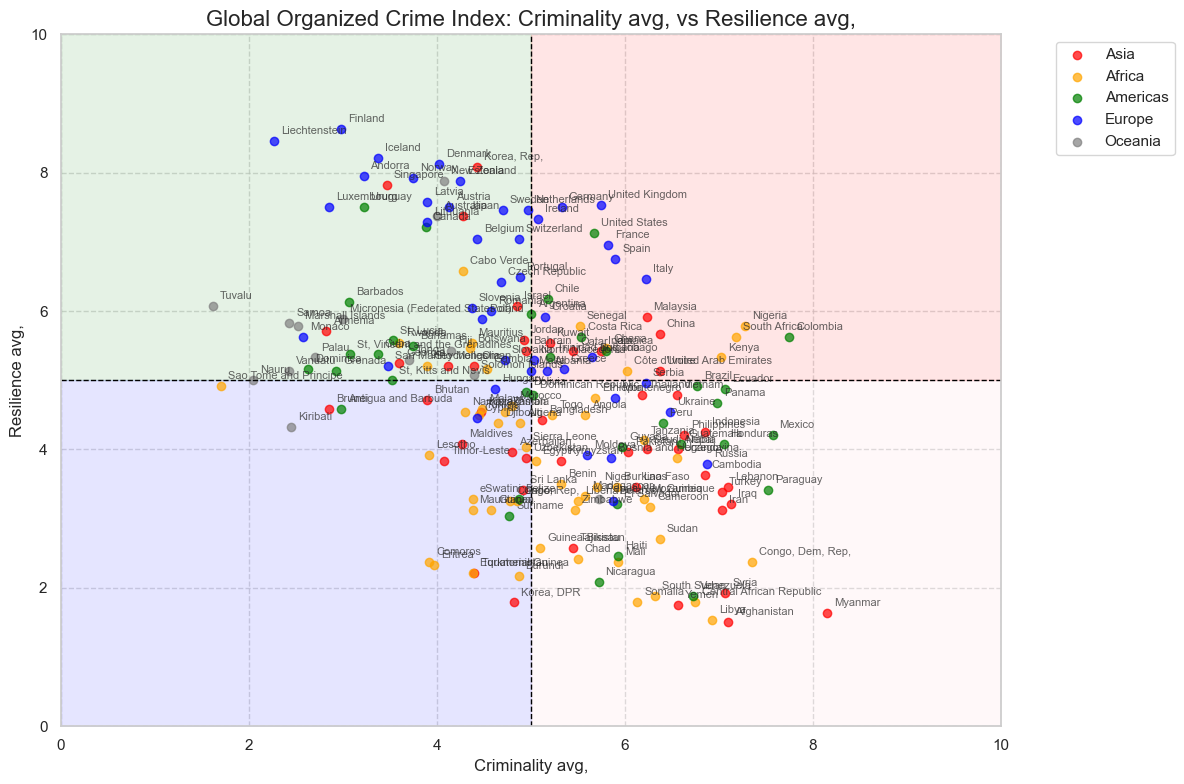

In [5]:
# %%
# jupyter: {'source_hidden': true}
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_interactive_crime_plot(file_path):
    """
    Create an interactive scatter plot with dropdown menus for selecting metrics
    
    Parameters:
    -----------
    file_path : str
        Path to the Excel file containing the dataset
    """
    # Read the Excel file
    df = pd.read_excel(file_path, sheet_name='2023_dataset')
    
    # Get list of numeric columns for dropdowns
    exclude_cols = ['Country', 'Continent', 'Region']
    numeric_cols = [col for col in df.columns if col not in exclude_cols]
    
    # Create dropdown widgets
    x_dropdown = widgets.Dropdown(
        options=numeric_cols,
        value='Criminality avg,',
        description='X-axis:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    y_dropdown = widgets.Dropdown(
        options=numeric_cols,
        value='Resilience avg,',
        description='Y-axis:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    def plot_scatter(x_metric, y_metric):
        """Create the scatter plot with the selected metrics"""
        plt.figure(figsize=(12, 8))
        
        # Color the quadrants
        plt.axvline(x=5, color='black', linestyle='--', linewidth=1)
        plt.axhline(y=5, color='black', linestyle='--', linewidth=1)
        
        # Fill quadrants with semi-transparent colors
        plt.fill_between([0, 5], 5, 10, color='green', alpha=0.1)  # Top-left
        plt.fill_between([5, 10], 5, 10, color='red', alpha=0.1)   # Top-right
        plt.fill_between([0, 5], 0, 5, color='blue', alpha=0.1)    # Bottom-left
        plt.fill_between([5, 10], 0, 5, color='pink', alpha=0.1)   # Bottom-right
        
        # Color mapping for continents
        continent_colors = {
            'Africa': 'orange',
            'Americas': 'green',
            'Asia': 'red',
            'Europe': 'blue',
            'Oceania': 'gray'
        }
        
        # Create scatter plot
        for continent in df['Continent'].unique():
            subset = df[df['Continent'] == continent]
            plt.scatter(subset[x_metric], subset[y_metric],
                      c=continent_colors[continent],
                      label=continent,
                      alpha=0.7)
        
        # Add country labels
        for _, row in df.iterrows():
            plt.annotate(row['Country'],
                        (row[x_metric], row[y_metric]),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8,
                        alpha=0.7)
        
        # Customize the plot
        plt.title(f'Global Organized Crime Index: {x_metric} vs {y_metric}',
                 fontsize=16)
        plt.xlabel(x_metric, fontsize=12)
        plt.ylabel(y_metric, fontsize=12)
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
    
    def update_plot(*args):
        """Callback function to update the plot when dropdowns change"""
        clear_output(wait=True)
        # Display dropdowns
        display(widgets.HBox([x_dropdown, y_dropdown]))
        # Create new plot
        plot_scatter(x_dropdown.value, y_dropdown.value)
    
    # Set up the callback
    x_dropdown.observe(update_plot, 'value')
    y_dropdown.observe(update_plot, 'value')
    
    # Initial plot
    update_plot()

# Example usage
if __name__ == '__main__':
    file_path = os.path.join(data_dir, 'global_oc_index.xlsx')
    create_interactive_crime_plot(file_path)

# Demographics
## Figure 8 - Projected WB Population
XX.

<Figure size 640x480 with 0 Axes>

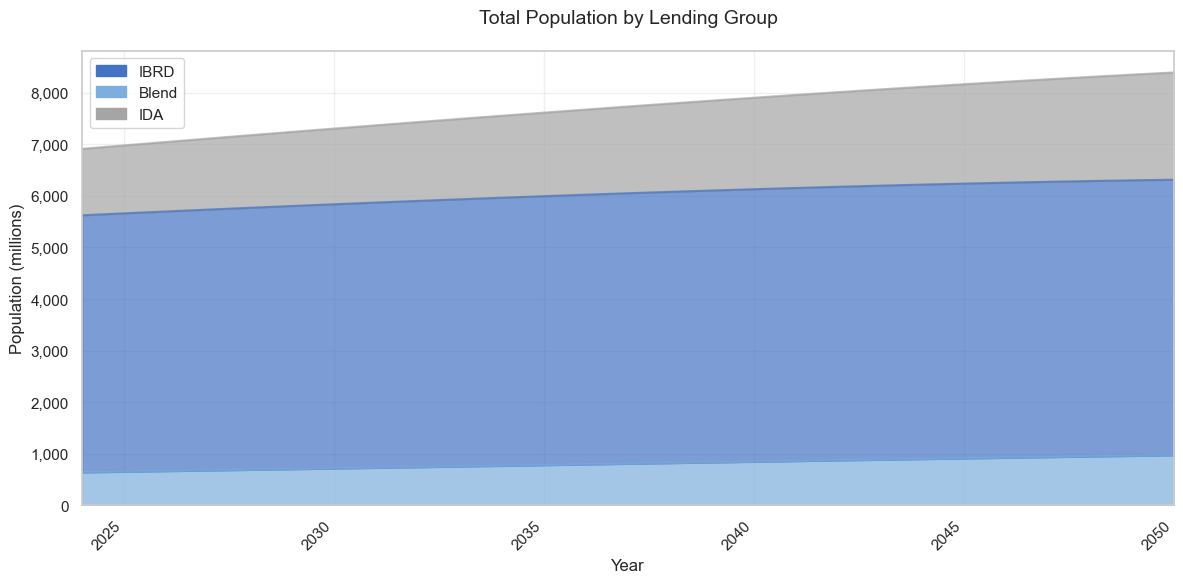

<Figure size 640x480 with 0 Axes>

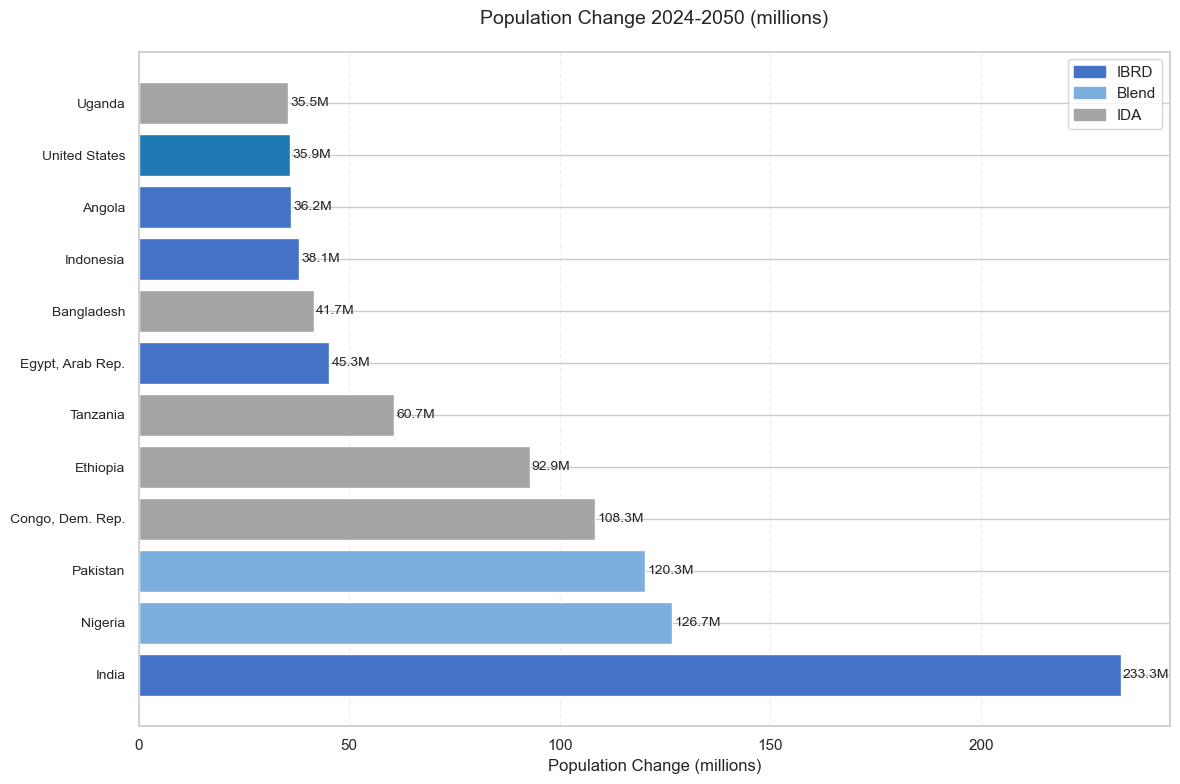

In [34]:
# %%
# jupyter: {'source_hidden': true}
# # Initialize the API client
# api_client = UNPopulationDataPortalAPI()

# # Test API connection
# if not api_client.test_api_connection():
#     logger.error("Unable to establish API connection.")
#     sys.exit(1)

# try:
#     # Retrieve country IDs
#     country_ids = api_client.get_country_ids()
#     logger.info(f"Total Countries Retrieved: {len(country_ids)}")
#     logger.info("First 10 Country IDs: %s", country_ids[:10])

# except Exception as e:
#     logger.error(f"An error occurred: {e}")

def plot_population_trends_by_lending(data_dir, end_year=2050):
    """
    Create stacked area chart of total population by lending group
    """
    # Read data
    file_path = os.path.join(data_dir, 'un_pop_data.xlsx')
    lend_group_path = os.path.join(data_dir, 'lend_group.xlsx')
    
    df = pd.read_excel(file_path, sheet_name='Medium variant')
    lending_df = pd.read_excel(lend_group_path)
    
    # Process data
    df = df.dropna(subset=['ISO3 Alpha-code'])
    df['Total Population, as of 1 January (thousands)'] = pd.to_numeric(
        df['Total Population, as of 1 January (thousands)'], 
        errors='coerce'
    )
    
    # Merge with lending group data
    df = df.merge(lending_df[['Code', 'Lending category', 'Economy']], 
                 left_on='ISO3 Alpha-code', 
                 right_on='Code', 
                 how='left')
    
    # Clear previous plots
    plt.clf()
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Color mapping
    color_map = {
        'IBRD': '#4472C4',     # Royal blue
        'Blend': '#7CAFDD',    # Lighter blue
        'IDA': '#A5A5A5'       # Gray
    }
    
    # Create pivot table for stacked area
    lending_group_pop = df.pivot_table(
        index='Year',
        columns='Lending category',
        values='Total Population, as of 1 January (thousands)',
        aggfunc='sum'
    )
    
    # Filter data up to end_year
    lending_group_pop = lending_group_pop[lending_group_pop.index <= end_year]
    
    # Create stacked area plot
    lending_group_pop.plot(
        kind='area',
        stacked=True,
        ax=ax,
        color=[color_map.get(cat, '#1F77B4') for cat in lending_group_pop.columns],
        alpha=0.7
    )
    
    # Customize plot
    ax.set_xlim(lending_group_pop.index.min(), end_year)
    ax.set_title('Total Population by Lending Group', fontsize=14, pad=20)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Population (millions)', fontsize=12)
    
    # Format y-axis with millions
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000):,}'))
    
    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add legend
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
    labels = list(color_map.keys())
    ax.legend(handles, labels, loc='upper left')
    
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_population_change_by_country(data_dir, start_year=2024, top_n=12):
    """
    Create horizontal bar chart of population change by country
    """
    # Read data
    file_path = os.path.join(data_dir, 'un_pop_data.xlsx')
    lend_group_path = os.path.join(data_dir, 'lend_group.xlsx')
    
    df = pd.read_excel(file_path, sheet_name='Medium variant')
    lending_df = pd.read_excel(lend_group_path)
    
    # Process data
    df = df.dropna(subset=['ISO3 Alpha-code'])
    df['Total Population, as of 1 January (thousands)'] = pd.to_numeric(
        df['Total Population, as of 1 January (thousands)'], 
        errors='coerce'
    )
    
    # Merge with lending group data
    df = df.merge(lending_df[['Code', 'Lending category', 'Economy']], 
                 left_on='ISO3 Alpha-code', 
                 right_on='Code', 
                 how='left')
    
    # Calculate population change
    pop_start = df[df['Year'] == start_year].set_index('ISO3 Alpha-code')['Total Population, as of 1 January (thousands)']
    pop_2050 = df[df['Year'] == 2050].set_index('ISO3 Alpha-code')['Total Population, as of 1 January (thousands)']
    pop_change = (pop_2050 - pop_start) / 1000  # Convert to millions
    
    # Add population change to 2050 data
    df_2050 = df[df['Year'] == 2050].copy()
    df_2050['Population Change (millions)'] = df_2050['ISO3 Alpha-code'].map(pop_change)
    
    # Clear previous plots
    plt.clf()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Color mapping
    color_map = {
        'IBRD': '#4472C4',     # Royal blue
        'Blend': '#7CAFDD',    # Lighter blue
        'IDA': '#A5A5A5'       # Gray
    }
    
    # Get top changes
    top_changes = df_2050.nlargest(top_n, 'Population Change (millions)').sort_values('Population Change (millions)')
    
    # Create horizontal bar chart
    bars = ax.barh(
        range(len(top_changes)),
        top_changes['Population Change (millions)'],
        color=[color_map.get(cat, '#1F77B4') for cat in top_changes['Lending category']]
    )
    
    # Customize plot
    ax.invert_yaxis()
    ax.set_title(f'Population Change {start_year}-2050 (millions)', fontsize=14, pad=20)
    ax.set_xlabel('Population Change (millions)', fontsize=12)
    ax.set_yticks(range(len(top_changes)))
    ax.set_yticklabels(top_changes['Economy'], fontsize=10)
    
    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5,                     # x position with offset
                bar.get_y() + bar.get_height()/2, # y position
                f'{width:,.1f}M',                 # text
                ha='left',                        # horizontal alignment
                va='center',                      # vertical alignment
                fontsize=10)                      # font size
    
    # Add legend
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
    labels = list(color_map.keys())
    ax.legend(handles, labels, loc='upper right')
    
    # Add grid
    ax.grid(True, axis='x', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Create and display both plots
    plot_population_trends_by_lending(data_dir)
    plot_population_change_by_country(data_dir)

# Development Indicators and FCV
## Figure 9.1 - Mortality Rate
XX.

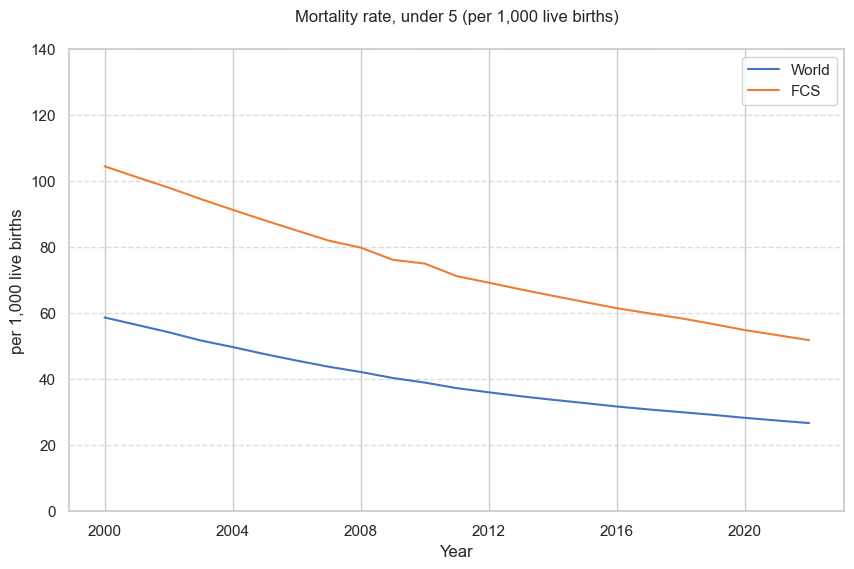

In [ ]:
# %%
# jupyter: {'source_hidden': true}
# FCS countries list
FCS_COUNTRIES = [
    'Afghanistan', 'Burkina Faso', 'Cameroon', 'Central African Republic', 
    'Congo, Dem. Rep.', 'Ethiopia', 'Haiti', 'Iraq', 'Lebanon', 'Mali', 
    'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Somalia', 'South Sudan',
    'Sudan', 'Syrian Arab Republic', 'Ukraine', 'West Bank and Gaza',
    'Yemen, Rep.', 'Burundi', 'Chad', 'Comoros', 'Congo, Rep.', 'Eritrea',
    'Guinea-Bissau', 'Kiribati', 'Kosovo', 'Libya', 'Marshall Islands',
    'Micronesia, Fed. Sts.', 'Papua New Guinea', 'São Tomé and Principe',
    'Solomon Islands', 'Timor-Leste', 'Tuvalu', 'Venezuela, RB', 'Zimbabwe'
]

def get_country_averages(wb_data, countries=None):
    """Helper function to calculate averages for a group of countries"""
    df = pd.DataFrame(wb_data)
    if countries:
        df = df[df['country'].isin(countries)]
    return df.groupby('date')['SH.DYN.MORT'].mean()

def plot_mortality_rate(wb_data):
    """
    Plot under-5 mortality rate
    Indicator: SH.DYN.MORT
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data for plotting
    df = pd.DataFrame(wb_data)
    
    # Calculate world average (using all countries)
    world_data = get_country_averages(wb_data)
    
    # Calculate FCS average
    fcs_data = get_country_averages(wb_data, FCS_COUNTRIES)
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('Mortality rate, under 5 (per 1,000 live births)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('per 1,000 live births')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    
    # Adjust y-axis range
    ax.set_ylim(0, 140)
    
    return fig


mortality_data = wb.get_indicator_data(indicator='SH.DYN.MORT', start_year=2000, end_year=2024)
fig = plot_mortality_rate(mortality_data)
plt.show()

## Figure 9.2 - Primary Completion Rate
XX.

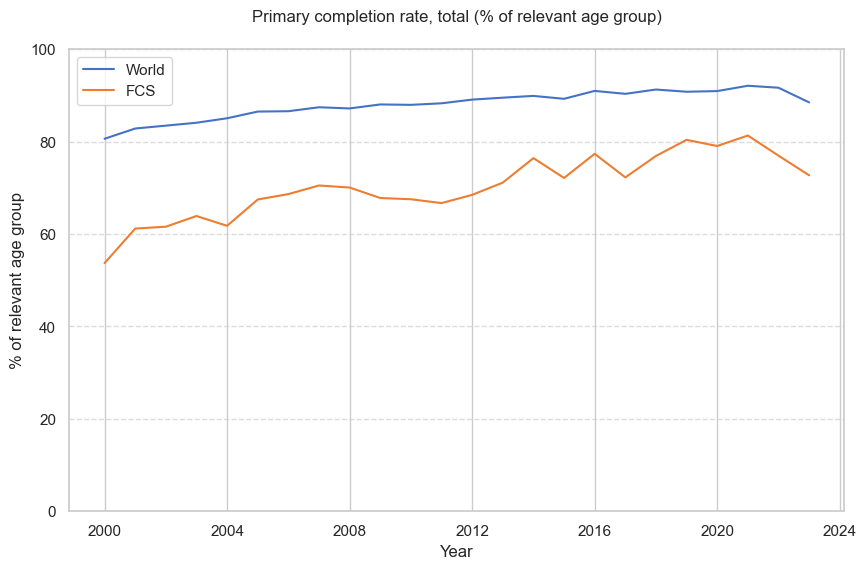

In [9]:
# %%
# jupyter: {'source_hidden': true}
def plot_primary_completion(wb_data):
    """
    Plot primary completion rate
    Indicator: SE.PRM.CMPT.ZS
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data
    df = pd.DataFrame(wb_data)
    
    # Calculate averages
    world_data = df.groupby('date')['SE.PRM.CMPT.ZS'].mean()
    fcs_data = df[df['country'].isin(FCS_COUNTRIES)].groupby('date')['SE.PRM.CMPT.ZS'].mean()
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('Primary completion rate, total (% of relevant age group)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('% of relevant age group')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_ylim(0, 100)
    
    return fig

# Get data and plot
primary_data = wb.get_indicator_data(indicator='SE.PRM.CMPT.ZS', start_year=2000, end_year=2024)
fig = plot_primary_completion(primary_data)
plt.show()

## Figure 9.3 - Sanitation
XX.

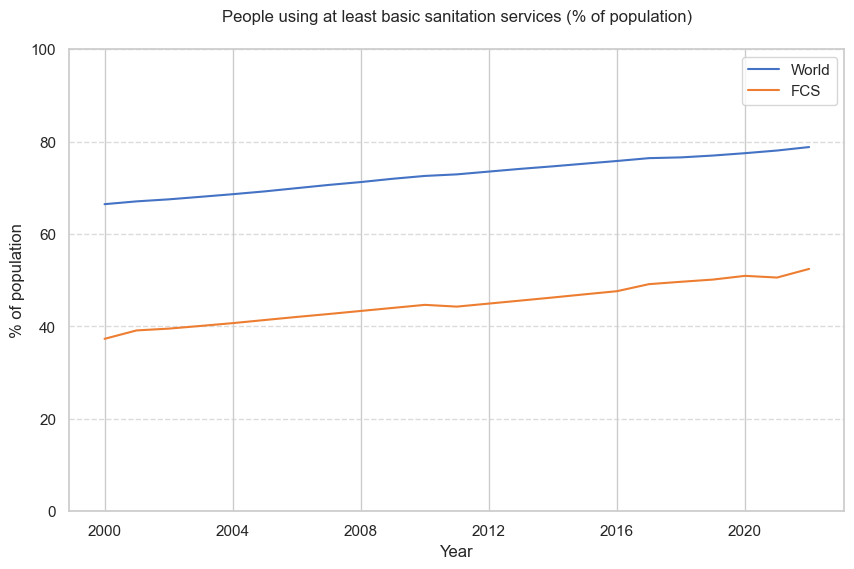

In [11]:
# %%
# jupyter: {'source_hidden': true}
def plot_sanitation(wb_data):
    """
    Plot basic sanitation services
    Indicator: SH.STA.BASS.ZS
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data
    df = pd.DataFrame(wb_data)
    
    # Calculate averages
    world_data = df.groupby('date')['SH.STA.BASS.ZS'].mean()
    fcs_data = df[df['country'].isin(FCS_COUNTRIES)].groupby('date')['SH.STA.BASS.ZS'].mean()
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('People using at least basic sanitation services (% of population)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('% of population')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_ylim(0, 100)
    
    return fig

# Get data and plot
sanitation_data = wb.get_indicator_data(indicator='SH.STA.BASS.ZS', start_year=2000, end_year=2024)
fig = plot_sanitation(sanitation_data)
plt.show()

## Figure 9.4 - Basic Drink Water
XX. 

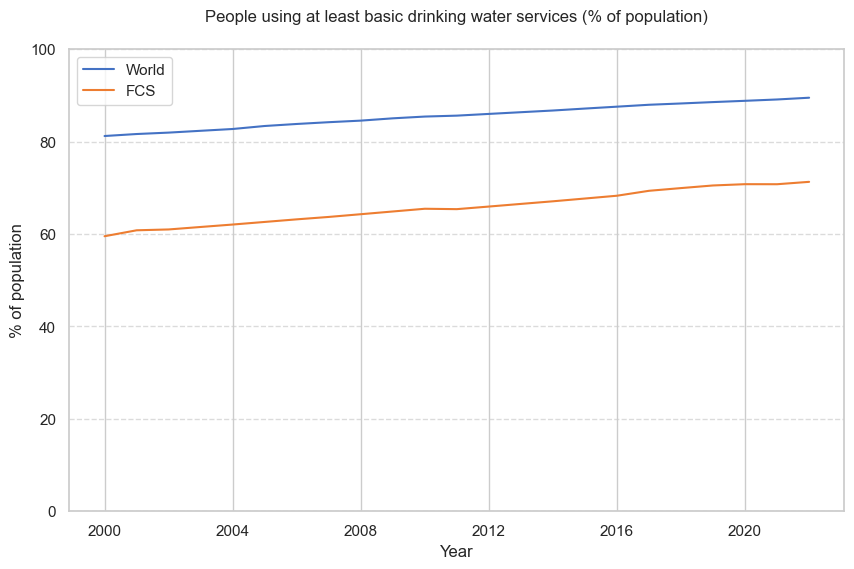

In [12]:
# %%
# jupyter: {'source_hidden': true}
def plot_water_services(wb_data):
    """
    Plot basic drinking water services
    Indicator: SH.H2O.BASW.ZS
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reshape data
    df = pd.DataFrame(wb_data)
    
    # Calculate averages
    world_data = df.groupby('date')['SH.H2O.BASW.ZS'].mean()
    fcs_data = df[df['country'].isin(FCS_COUNTRIES)].groupby('date')['SH.H2O.BASW.ZS'].mean()
    
    # Plot
    ax.plot(world_data.index, world_data.values, color='#4472C4', label='World')
    ax.plot(fcs_data.index, fcs_data.values, color='#ED7D31', label='FCS')
    
    # Customize
    ax.set_title('People using at least basic drinking water services (% of population)', pad=20)
    ax.set_xlabel('Year')
    ax.set_ylabel('% of population')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_ylim(0, 100)
    
    return fig

# Get data and plot
water_data = wb.get_indicator_data(indicator='SH.H2O.BASW.ZS', start_year=2000, end_year=2024)
fig = plot_water_services(water_data)
plt.show()

# Fragility
## Figure 10 - States of Fragility 2022
XX.

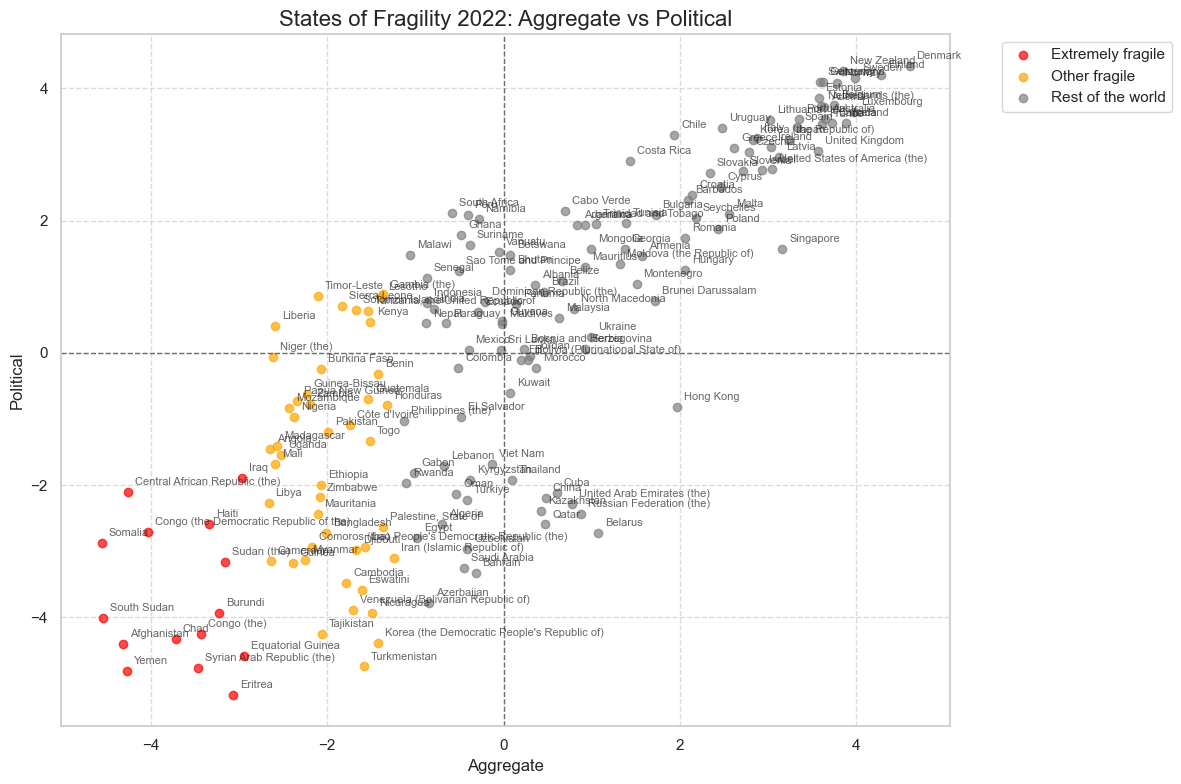

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_interactive_fragility_plot(file_path):
    """
    Create an interactive scatter plot with dropdown menus for selecting fragility metrics
    
    Parameters:
    -----------
    file_path : str
        Path to the Excel file containing the States of Fragility 2022 dataset
    """
    # Read the Excel file
    df = pd.read_excel(file_path, sheet_name='Scores')
    
    # Clean column names by removing 'PC1'
    df.columns = [col.replace('.PC1', '') for col in df.columns]
    
    # Get list of numeric columns for dropdowns
    exclude_cols = ['iso3c', 'country', 'type']
    numeric_cols = [col for col in df.columns if col not in exclude_cols]
    
    # Create dropdown widgets
    x_dropdown = widgets.Dropdown(
        options=numeric_cols,
        value='Aggregate',  # Default value
        description='X-axis:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    y_dropdown = widgets.Dropdown(
        options=numeric_cols,
        value='Political',  # Default value
        description='Y-axis:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    def plot_scatter(x_metric, y_metric):
        """Create the scatter plot with the selected metrics"""
        plt.figure(figsize=(12, 8))

        # Add reference lines at 0
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
        
        # Color mapping for fragility types
        type_colors = {
            'Extremely fragile': 'red',
            'Other fragile': 'orange',
            'Rest of the world': 'gray'
        }
        
        # Create scatter plot
        for fragility_type in df['type'].unique():
            subset = df[df['type'] == fragility_type]
            plt.scatter(subset[x_metric], subset[y_metric],
                      c=type_colors.get(fragility_type, 'gray'),
                      label=fragility_type,
                      alpha=0.7)
        
        # Add country labels
        for _, row in df.iterrows():
            plt.annotate(row['country'],
                        (row[x_metric], row[y_metric]),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8,
                        alpha=0.7)
        
        # Customize the plot
        plt.title(f'States of Fragility 2022: {x_metric} vs {y_metric}',
                 fontsize=16)
        plt.xlabel(x_metric, fontsize=12)
        plt.ylabel(y_metric, fontsize=12)
        
        # Add grid and legend
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
    
    def update_plot(*args):
        """Callback function to update the plot when dropdowns change"""
        clear_output(wait=True)
        # Display dropdowns
        display(widgets.HBox([x_dropdown, y_dropdown]))
        # Create new plot
        plot_scatter(x_dropdown.value, y_dropdown.value)
    
    # Set up the callback
    x_dropdown.observe(update_plot, 'value')
    y_dropdown.observe(update_plot, 'value')
    
    # Initial plot
    update_plot()

# Example usage
if __name__ == '__main__':
    file_path = os.path.join(data_dir, 'sof_2022.xlsx')
    create_interactive_fragility_plot(file_path)

# Structural Factors [PLACEHOLDER FOR SLOW MOVING FACTORS]